# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [48]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [50]:
x_train[0].shape

(28, 28)

Check the sample train data

In [51]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [52]:

y_train[333]

8

In [53]:
#Check the actual image

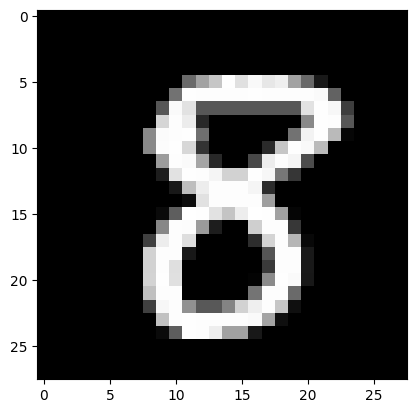

In [54]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [55]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [56]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [57]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [58]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [60]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 18s 25ms/step - loss: 0.2549 - accuracy: 0.9221 - val_loss: 0.1164 - val_accuracy: 0.9610
Epoch 2/30
469/469 [==============================] - 11s 23ms/step - loss: 0.1042 - accuracy: 0.9682 - val_loss: 0.0893 - val_accuracy: 0.9724
Epoch 3/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0740 - accuracy: 0.9774 - val_loss: 0.0875 - val_accuracy: 0.9742
Epoch 4/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0574 - accuracy: 0.9815 - val_loss: 0.0717 - val_accuracy: 0.9778
Epoch 5/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0648 - val_accuracy: 0.9806
Epoch 6/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0675 - val_accuracy: 0.9830
Epoch 7/30
469/469 [==============================] - 9s 20ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0703 - val_accuracy: 0.98

Use Keras evaluate function to evaluate performance on the test set

In [61]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08316248655319214
Test accuracy: 0.9872000217437744


Interpret the result

#type your answer here
The model got a pretty low test loss at about 0.1. This means that the network correctly predicts the true label most of the time. This small test loss indicates that the model learns the pattern of each number. Additionally, the test accuracy is high at 0.98. This indicates that at the 10 neurons in the output layer, the model correctly place the only 1 value in the correct neuron. The model makes a correct prediction overall.

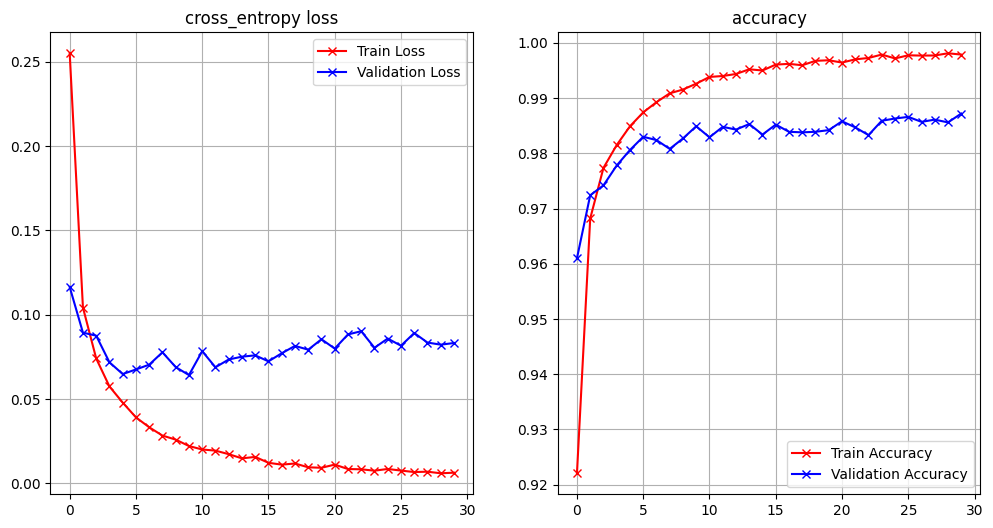

In [62]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here
It is a good indicator that both losses are very low. Also, the training loss continuously goes down to zero indicating that the model learns the pattern of the numbers pretty well and consistently. Meanwhile, its validation loss fluctuates between 0.1 to 0.05. However, it looks smoother compared to the first model. This means that the regularization of the second model improved compared to the first one.

On the other hand, the training accuracy continuously goes up to 100% indicating that it learns the pattern of the numbers pretty well. Additionally, the validation accuracy goes up near the training accuracy. This shows a good performance of the model in both training and unseen data. Overfitting in the data was prevented. 

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [63]:
#type your code here
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.3289 - accuracy: 0.9003 - val_loss: 0.1262 - val_accuracy: 0.9605
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1525 - accuracy: 0.9543 - val_loss: 0.0994 - val_accuracy: 0.9706
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1172 - accuracy: 0.9650 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1002 - accuracy: 0.9701 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 5/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0882 - accuracy: 0.9741 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.0659 - val_accuracy: 0.9816
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0730 - accuracy: 0.9785 - val_loss: 0.0662 - val_accuracy: 0.981

In [ ]:
model_1.summary()

The first model has 512 neurons in each of its two hidden layers while the second model has 400 and 300 neurons. In the first layer, the first model has more parameters at 401920 while the second model has 314000. In the second layer, the first has 262656 parameters while the second model only has 120300. Additionally, the parameters in the output layer in both of the models are 5130 and 3010, respectively. In total, the first model has more parameters at 669706 compared to the second model which only has 437310 parameters.

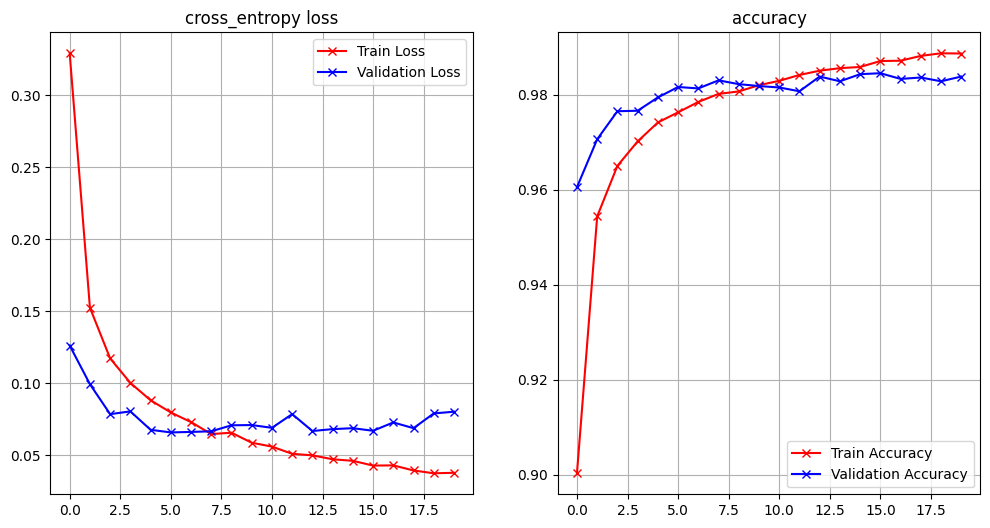

In [67]:
plot_loss_accuracy(history_1)

The low and consistent loss in this model shows a better regularization in the model. Compared to before that has some jagged plot, the line in both training and validation are smooth and converging. Meanwhile, the accuracy in training data is pretty high showing a good performance in learning. The validation is not only close to the training accuracy, but it has a higher accuracy than the training indicating a better prediction than the training data. This shows that overfitting was stopped and consistent learning on the data was operated although it can still be improveed. 

In [66]:
#type your code here
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))
#epochs , learning rate, batch size and optimizer
learning_rate = .001
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 512
epochs = 100

callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    callbacks=[callback],
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/100
118/118 [==============================] - 6s 34ms/step - loss: 0.4707 - accuracy: 0.8074 - val_loss: 0.1826 - val_accuracy: 0.9146
Epoch 2/100
118/118 [==============================] - 4s 36ms/step - loss: 0.1387 - accuracy: 0.9172 - val_loss: 0.1065 - val_accuracy: 0.9311
Epoch 3/100
118/118 [==============================] - 5s 39ms/step - loss: 0.0987 - accuracy: 0.9303 - val_loss: 0.0888 - val_accuracy: 0.9403
Epoch 4/100
118/118 [==============================] - 4s 30ms/step - loss: 0.0867 - accuracy: 0.9361 - val_loss: 0.0813 - val_accuracy: 0.9384
Epoch 5/100
118/118 [==============================] - 4s 30ms/step - loss: 0.0801 - accuracy: 0.9402 - val_loss: 0.0761 - val_accuracy: 0.9481
Epoch 6/100
118/118 [==============================] - 4s 33ms/step - loss: 0.0764 - accuracy: 0.9427 - val_loss: 0.0728 - val_accuracy: 0.9470
Epoch 7/100
118/118 [==============================] - 4s 30ms/step - loss: 0.0725 - accuracy: 0.9466 - val_loss: 0.0690 - val_accuracy:

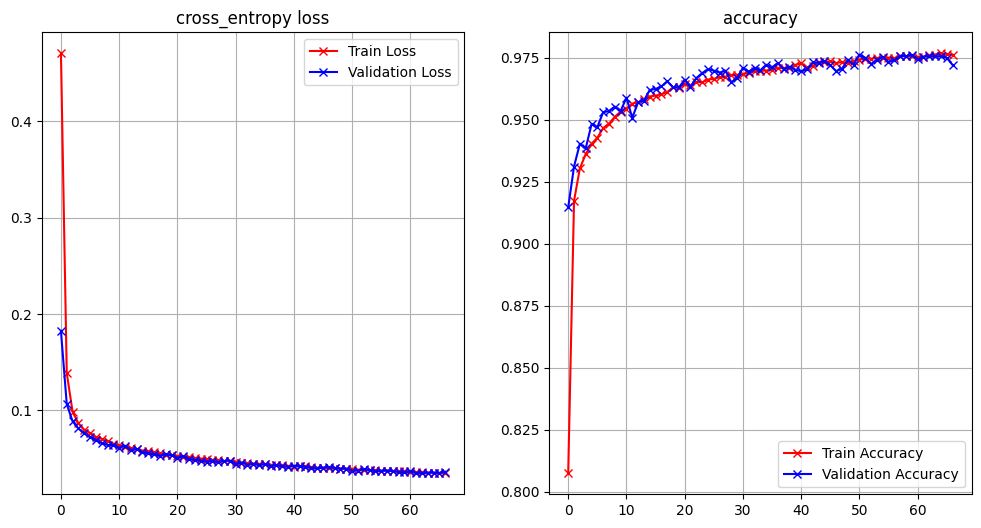

In [68]:
plot_loss_accuracy(history_2)

The low and consistent loss in this model shows a better regularization in the model. Compared to before that has some jagged plot, the line in both training and validation are smooth and converging. Meanwhile, the accuracy in training data is pretty high showing a good performance in learning. The validation is not only close to the training accuracy, but it has a higher accuracy than the training indicating a better prediction than the training data. This shows that overfitting was stopped and consistent learning on the data was operated.

Trying on cancer dataset on previous activity

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target
df['diagnosis'].replace({'B': 0, 'M':1}, inplace=True)
#df.drop(["id"], axis=1, inplace=True)
for col in df.columns:
    df[col].replace('?', np.nan, inplace=True)
    df[col].replace('', np.nan, inplace=True)
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

normalizer = StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.transform(x_test)

In [79]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [81]:
model_3 = Sequential()
model_3.add(Dense(20, activation='relu', input_shape=(30,), kernel_regularizer=l2(0.001)))
model_3.add(Dropout(0.02))
model_3.add(Dense(10, activation='relu', kernel_regularizer=l2(0.001)))
model_3.add(Dropout(0.02))
model_3.add(Dense(1, activation='tanh'))
#epochs , learning rate, batch size and optimizer
learning_rate = .0005
model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 30
epochs = 100

callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    callbacks=[callback],
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 36ms/step - loss: 4.3442 - accuracy: 0.4319 - val_loss: 2.9871 - val_accuracy: 0.5804
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 1.5255 - accuracy: 0.6854 - val_loss: 1.3093 - val_accuracy: 0.7762
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5570 - accuracy: 0.8192 - val_loss: 0.7989 - val_accuracy: 0.8322
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3990 - accuracy: 0.8521 - val_loss: 0.5577 - val_accuracy: 0.8531
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8803 - val_loss: 0.4452 - val_accuracy: 0.8811
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3407 - accuracy: 0.8803 - val_loss: 0.4146 - val_accuracy: 0.8811
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3862 - accuracy: 0.8850 - val_loss: 0.3961 - val_accuracy: 0.8881
Epoch 8/100


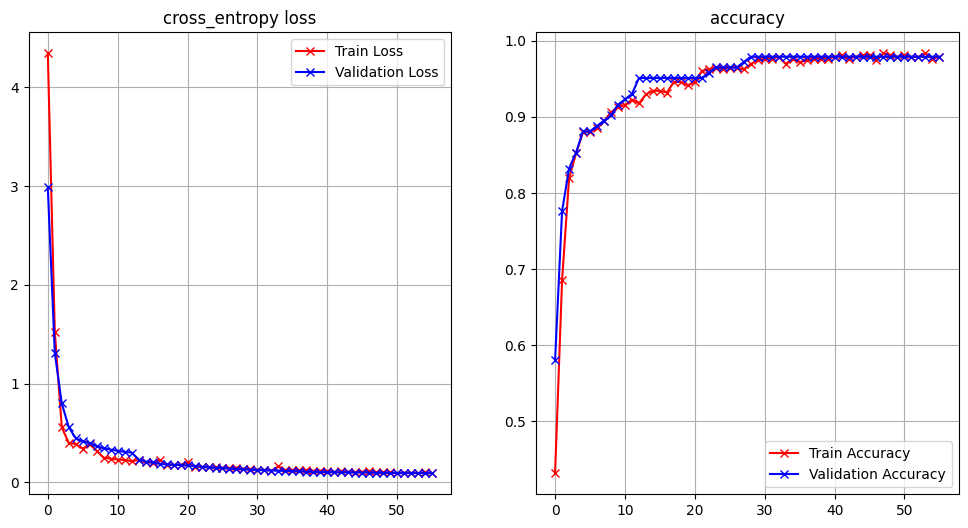

In [82]:
plot_loss_accuracy(history_3)

In [83]:
y_pred_prob_nn = model_3.predict(x_test)
y_pred_class_nn = (y_pred_prob_nn > 0.5).astype("int32")
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn)))

5/5 [==============================] - 0s 3ms/step
accuracy is 0.979
roc-auc is 0.998


The previous activity got a high accuracy and roc score (at about 99% and 97%) without having any regularization. Upon adding regularization, the regularized model slightly improved. In addition, the previous model ran continuously up to 2000 epochs while the regularized model only ran at 50 epochs. This made its time and resource use less. In the regularized model, the validation and training plots are pretty close to each other indicating a good performance with no under/overfitting.

#### Conclusion

#type your answer here
Regularization is a technique that adds constraints to the model to avoid overfitting. This is very useful in instances where the model performs well in training but underperforms in validation (unseen) data. There are various regularization techniques such as but not limited to l2 regularization, dropout, and early stopping.

In the activity, a huge network with a massive amount of parameters was created for image recognition of digits. By adding regularization, the model performed well and consistently throughout all the epochs. The first model has a jagged and inconsistent performance on the validation data but with regularization, the model became consistent and smooth.

Regularization prevents overfitting by removing neuron bias through dropout and l2 regularization. Dropout introduces a zero output so that the neuron will learn in a more diverse set of neurons instead of having favorites. L2 kind of prevents huge weight on the neurons. Meanwhile, callbacks allow us to cut the training before the validation and training performance diverge from each other.

Regularization allows us to have a more balanced and consistent model while preventing overfitting in training.
